In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000
mean,0.797953,61.749447,57.457231,3932.885875,5.731183,5.734554,3.538753
std,0.474016,1.432641,2.234497,3989.452937,1.121767,1.142143,0.705707
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


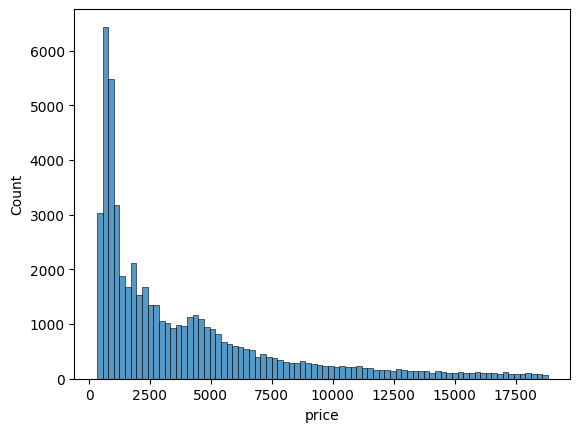

In [4]:
sns.histplot(df, x='price')
plt.show()

In [5]:
# confidence interval for mean diamond price

# variables for n, x-bar, s, confidence
n = df['price'].count()
xbar = df['price'].mean()
s = df['price'].std()
conf = 0.95

# Standard error of the mean
SEM = s / np.sqrt(n)
SEM

# calculate confidence interval
interval = stats.norm.interval(confidence=conf, loc=xbar, scale=SEM)
interval

(np.float64(3899.219067451682), np.float64(3966.5526831647326))

In [6]:
interval[0]

np.float64(3899.219067451682)

In [7]:
print('With 95% confidence, the true mean diamond price is between', interval[0], 'and', interval[1])

With 95% confidence, the true mean diamond price is between 3899.219067451682 and 3966.5526831647326


In [9]:
# goal: test whether 'Premium' cut diamonds have an average price > $4500
print(pd.unique(df['cut']))

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [10]:
# What is the average price of Premium diamonds?
df.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3929.812309
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [11]:
alpha = 0.05
test_results = stats.ttest_1samp(df[df['cut'] == 'Premium']['price'], popmean=4500)
test_results

TtestResult(statistic=np.float64(2.275084997124123), pvalue=np.float64(0.02291611091679631), df=np.int64(13790))

In [12]:
if test_results[1] > alpha:
    print('Failed to reject the null with p-value', test_results[1])
else:
    print('Rejected the null with p-value', test_results[1])

Rejected the null with p-value 0.02291611091679631


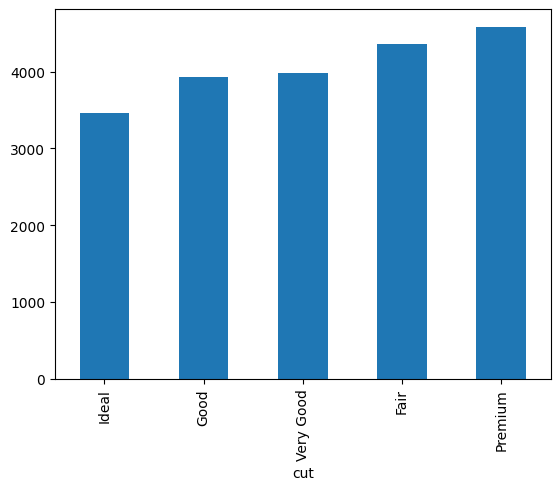

In [14]:
df.groupby('cut')['price'].mean().sort_values().plot(kind='bar')
plt.show()

/tmp/ipykernel_88/4286997943.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='price', y='cut', order=cut_order, palette='Blues_r')


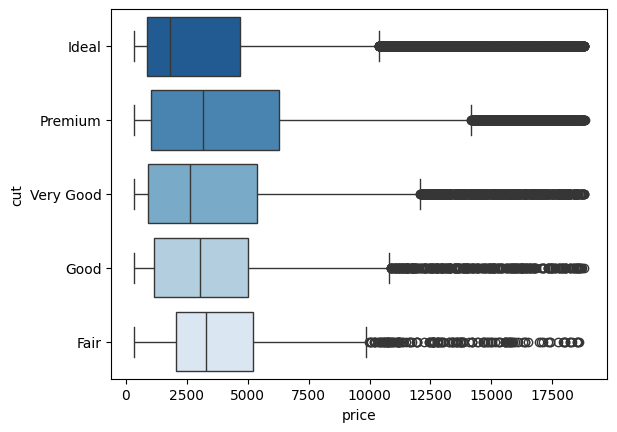

In [17]:
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sns.boxplot(df, x='price', y='cut', order=cut_order, palette='Blues_r')
plt.show()

In [18]:
very_goods = df[df['cut'] == 'Very Good']['price']
goods = df[df['cut'] == 'Good']['price']
test_results = stats.ttest_ind(very_goods, goods)
test_results

TtestResult(statistic=np.float64(0.7941427626594914), pvalue=np.float64(0.4271234189400054), df=np.float64(16987.0))

In [19]:
if test_results[1] > alpha:
    print('Failed to reject the null with p-value', test_results[1])
else:
    print('Rejected the null with p-value', test_results[1])

Failed to reject the null with p-value 0.4271234189400054


Sample Mean:  0.050453941370520936
Sample standard Deviation:  0.028872750435734975


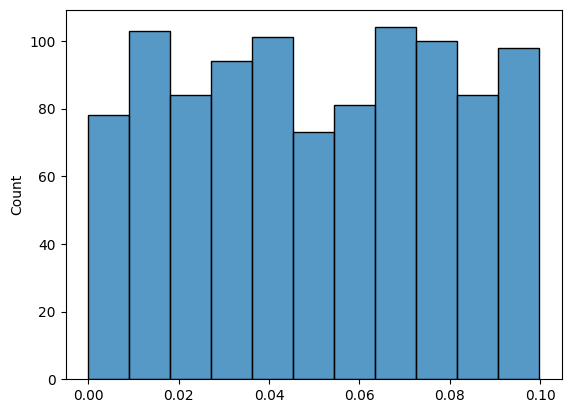

In [20]:
# sampling random discounts ranging from 0 to 10%

n = 1000
sample = np.random.uniform(low=0, high=0.1, size=n)
xbar = sample.mean()
s = sample.std()
print('Sample Mean: ', xbar)
print('Sample standard Deviation: ', s)
sns.histplot(sample)
plt.show()

In [22]:
interval = stats.norm.interval(confidence=0.95, loc=xbar, scale=s)
print('With 95% confidence, the true value is between', interval[0], 'and', interval[1])

With 95% confidence, the true value is between -0.006135609618132767 and 0.10704349235917464


In [23]:
n = 1000
contains_0_05 = 0
does_not_contain_0_05 = 0

for _ in range(100):
    sample = np.random.uniform(low=0, high=0.1, size=n)
    xbar = sample.mean()
    s = sample.std()
    SEM = s / np.sqrt(n)
    interval = stats.norm.interval(confidence=0.95, loc=xbar, scale=SEM)

    if interval[0] <= 0.05 <= interval[1]:
        contains_0_05 += 1
    else:
        does_not_contain_0_05 += 1

print('Number of intervals containing 0.05:', contains_0_05)
print('Number of intervals not containing 0.05:', does_not_contain_0_05)

Number of intervals containing 0.05: 91
Number of intervals not containing 0.05: 9


In [24]:
# create simulation of 1000 diamond prices from normal distribution
# mean: 3932.799722
# st.dev: 750

n = 1000
for _ in range(100):
    sample = np.random.normal(loc=3932, scale=750, size=n)
    xbar = sample.mean()
    s = sample.std()
    SEM = s / np.sqrt(n)
    interval = stats.norm.interval(confidence=0.95, loc=xbar, scale=SEM)
    print(interval)

(np.float64(3897.682972595774), np.float64(3992.3039798521377))
(np.float64(3870.3033369748773), np.float64(3961.273362601709))
(np.float64(3869.2358766080615), np.float64(3962.357014246004))
(np.float64(3867.153362254551), np.float64(3963.569068645408))
(np.float64(3896.008985278975), np.float64(3990.111238475706))
(np.float64(3891.980317531524), np.float64(3983.5578407845646))
(np.float64(3838.1465118301967), np.float64(3933.1875737771925))
(np.float64(3842.631329115099), np.float64(3935.6288291678065))
(np.float64(3921.4672553559753), np.float64(4013.6976647515135))
(np.float64(3901.633809995051), np.float64(3993.109365430473))
(np.float64(3894.9561999448065), np.float64(3987.760961851663))
(np.float64(3898.631356589367), np.float64(3990.8774995172053))
(np.float64(3890.0701756147005), np.float64(3983.0256106085358))
(np.float64(3897.6953201726737), np.float64(3989.9401518736304))
(np.float64(3912.0449232391197), np.float64(4004.2322825447677))
(np.float64(3889.093296770938), np.flo

In [25]:
n = 1000
contains_mu = 0
does_not_contain_mu = 0

for _ in range(100):
    sample = np.random.normal(loc=3932, scale=750, size=n)
    xbar = sample.mean()
    s = sample.std()
    SEM = s / np.sqrt(n)
    interval = stats.norm.interval(confidence=0.95, loc=xbar, scale=SEM)

    if interval[0] <= 3932 <= interval[1]:
        contains_mu += 1
    else:
        does_not_contain_mu += 1

print('Number of intervals containing 3932:', contains_mu)
print('Number of intervals not containing 3932:', does_not_contain_mu)

Number of intervals containing 3932: 91
Number of intervals not containing 3932: 9
